# F1 Grand Prix Results Predictor
## with Machine Learning
#### Mikayla Piercy, 18023721

#### Introduction to F1. 
Formula 1 (F1) is an auto-racing class which uses the fastest regulated racing cars in the world. The championship consists of 10 constructors, who have 2 drivers each competing at each Grand Prix. Drivers compete for both individual and team points, with the top 10 positions gaining points and top 3 on the podium. Drivers points contribute to their standings in the drivers championship, while a combination of both drivers of a teams points contribute to the constructor championship. The following point system is used:

| Pos. | Pts. |
| :---- | :---- |
| 1st | 25 |
| 2nd | 18 |
| 3rd | 15 |
| 4th | 12 |
| 5th | 10 |
| 6th | 8 |
| 7th | 6 |
| 8th | 4 |
| 9th | 2 |
| 10th | 1 |  

With 1 bonus point being awarded to fastest lap, and additional points if a sprint race is used to determine grid positions rather than the typical qualifying format.  
  
The typical Grand Prix weekend also involves the following events:  
**Friday:**  
- Practice 1 (P1)
- Practice 2 (P2)  
Allows drivers to become acquainted with the track and for teams to try out race strategies.  

**Saturday:**
- Practice 3 (P3)
- Qualifying  
Qualifying is split into three segments of the drivers aiming to get the fastest lap they can, with the slowest 5 drivers getting eliminated in both Q1 and Q2. The standings after qualifying determines the starting position of each driver on the grid for the real race.  

**Sunday:**  
- The Race  
  
#### Purpose of this Project
The purpose of this project is to predict whether drivers will finish on the podium (1-3), in the points (4-10) or score no points in a Grand Prix. As one of the attributes used is a drivers qualifying time/grid positions, these would have to be avaiable prior to predictions being made (qualifying must be complete).
  
#### What it does account for
The data used to train the classifier models looks into the following attributes:
- the circuit
- weather
- driver (inc. age and nationality)
- constructor
- grid position
- driver points, standings and wins
- constructor points, standings and wins
- qualifying time
  
#### What is doesn't account for
Sometimes all it takes is 1/100th of a second to determine someones position in a race, so here are some of the key attributes which these models do not consider:
- race strategy (pit stops, tyre compounds, fuel)
- data from previous seasons (models are built using only data from the current 2021 season)
- crashes (common and unpredictable)
- there are only 3 podium positions and 7 remaining point positions each race
  
  
#### Collating and Preprocessing the Data
A primary source for the data I used is [this dataset](https://www.kaggle.com/prajwalsood/f1-race-by-race-19832021) from Prasjwal Sood (2021). I took just the 2021 data (as of 15/09) and combined the .csv files from each round into one large .arff file with a few changes to the attributes. As the original dataset was not a suitable format/collation, all instances were manually entered so I had to be extra careful about data entry errors. There were also a few rounds of data missing which I retrieved all of the data for. Where possible I tried to use nominal attributes rather than numeric, particularly for the set numerical values such as positions/standings. I also added in a couple of more rounds with recent data from the last couple of weeks, so that predictions would hopefully be more accurate when it comes to testing upcoming races.

The dataset created holds 229 instances of data, all from the current 2021 season, due to having to create the dataset file manually and gather some of the rounds of data myself. As it isn't uncommon for drivers to change constructors between seasons and the constructors cars play a big part in a drivers results, not including data from seasons prior to 2021 means that this dataset may have some overfitting. The data may not be quite general enough to make as accurate predictions for future grands prix, as the models are trained from a more specific dataset. F1 regulations on cars change frequently and can have massive impacts on which constructors designs are likely to perform better in certain seasons or on different circuits. This sees drivers changing constructors, among other reasons, so including race data from prior seasons would theoretically give more accuarate predictions.

Initially, the idea was to predict whether or not a driver would get a podium finish or not, as shown below.

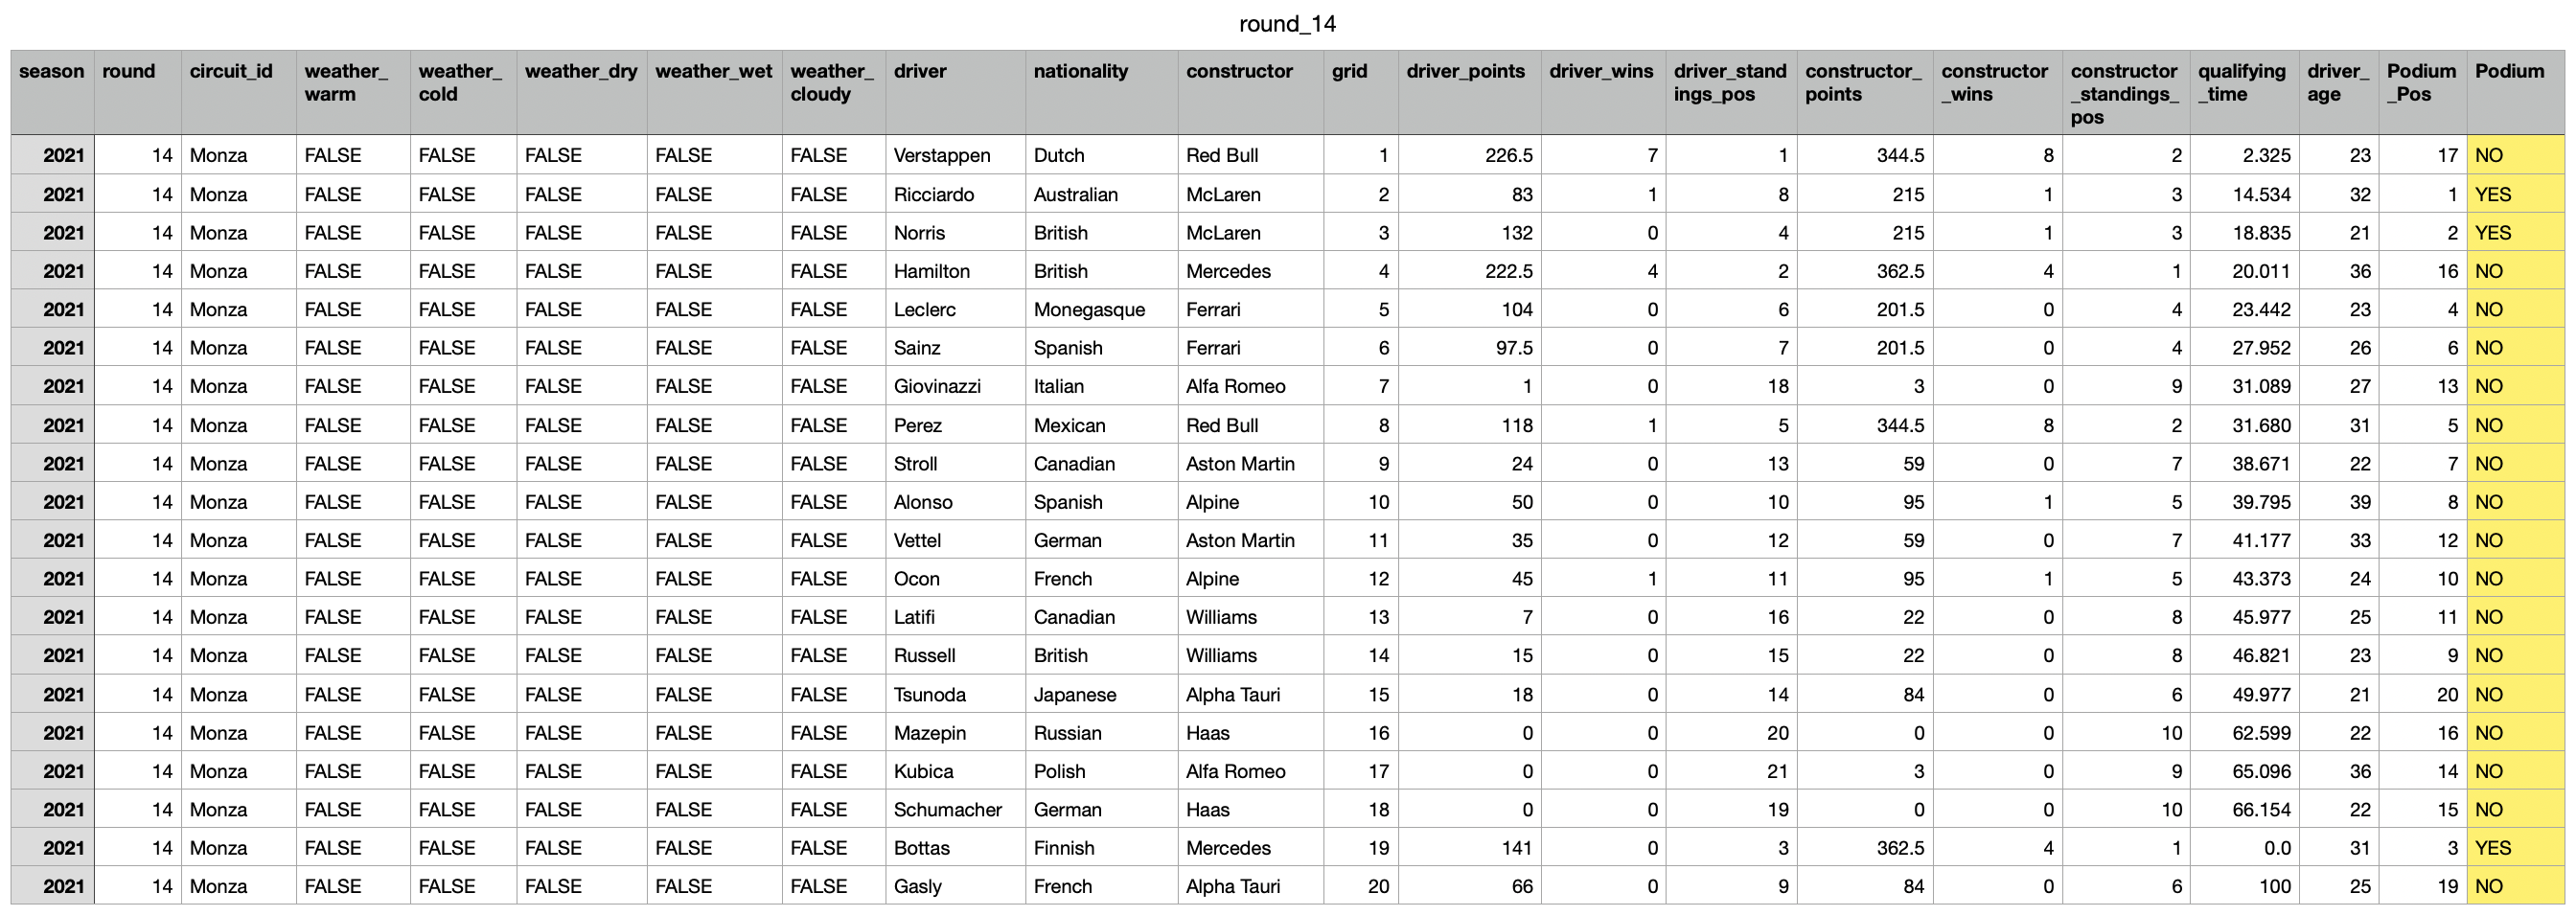

Due to the varying ranges of numerical data for fields such points and qualifying times, I made sure to normalise the data so the values were on a more consistent scale.
    
#### Training the Models  
**Naive Bayes:**  
The Naive Bayes classification algorithm works well with nominal values, such as the driver, constructor and grid positions. Although the Bayes Theorum assumes all nominal attributes are independent of eachother, which is not the case for this project, this algorithm can still be largely effective.  
  
**J48 Decision Tree:**  
The J48 decision tree uses decision nodes and their 'leaf' outcomes to classify an instance of data against the class variable.
  
**Logistic Regession:**  
Logistic regression is a binary classification algorithm which works really well with numerical values. I thought this was a suitable algorithm as a model since I was prediction YES/NO for whether a driver would get a podium position, and used numerous numerical values such as the driver/constructor points and their qualifying times, which arguably are some of the more telling attributes of a drivers capabilities that weekend.
  
**k-Nearest Neighbours:**  
k-Nearest Neighbours can be used for both classification and regression. It assumes that instances will appear in close proximity to other instances with similar values. This is done via the distance between points on a graph. Due to a higher k value typically providing more accurate classifications, I tested the KNN algorithm with a value of both 1 and 2 to contrast.
  
**Support Vector Machines:**  
SVM uses different decision boundaries to make classificications about an instance of data. Data which falls on either side of these boundaries can be classified as the different classes. The more input features, the more complex the decision boundaries become.   
  
**Multilayer Perceptron**  
Multilayer Perceptron is a deep learning classification algorithm which uses a directed graph between a set of input and output variables. It quickly calculates the derivatives and gradients using a backpropogation algorithm, which requires a known output for each input. This makes it a popular classification supervised algorithm for prediction analysis.  
  
**REPTree**  
REPTree uses a decision tree with regression to make the predictions. It is known for providing higher accuracies with cross-validation techniques.  
    
    
I initially chose to test a large range of algorithms to get an idea of how they all worded with the different training methods on this dataset. I then trained the models using these different algorithms and recorded both the accuracies and Matthews correlation coefficient (MCC) values for each outcome. Each algorithm was tested using; training data, 10-fold cross-validation as well as a 80%/20% split. As the MCC  is a measure of the quality of the classifications, with 1 being a great model and -1 being a poor model, I felt this would also be a good indicator of model effectiveness and how well they will make future predictions.   

The three different methods used to train each algorithm:  
**Training Data**   
The training set builds a model on the provided dataset, and then applies it to the same file to get the accuracies. This means that some classifiers, like KNN and Logistic Regression, will always get 100% accuracy on the training set. As the trained models are being used on the exact same data I plan on predominantly using the results of the cross validation models, although I wanted to trial them all to visualise the results better.  
  
**Cross Validation**
Cross validation (with 10 fold) splits the data into ten sections, uses nine of those to train the model, then tests it on the last one. It then repeats this process nine more times training and testing on a different set each time. This method is the most time consuming, but typically the most accurate. I feel that this option is probably the best option to use the models from this training method where possible.  
    
**80/20 Percentage Split**
The 80/20 percentage split is much faster than the cross fold validation, as it just uses a single fold. Weka allows you to choose the exact split, but I chose to do an 80/20 as it seemed the most popular for this method, to train a decent amount but also have a good amount to make predictions. Percentage split then uses a random 80% of the data to train the model, then the remaining 20% to test the model.   
  
#### Model Results  
After training up the original models, the tested outputs had the following accuracies and MCC values.   
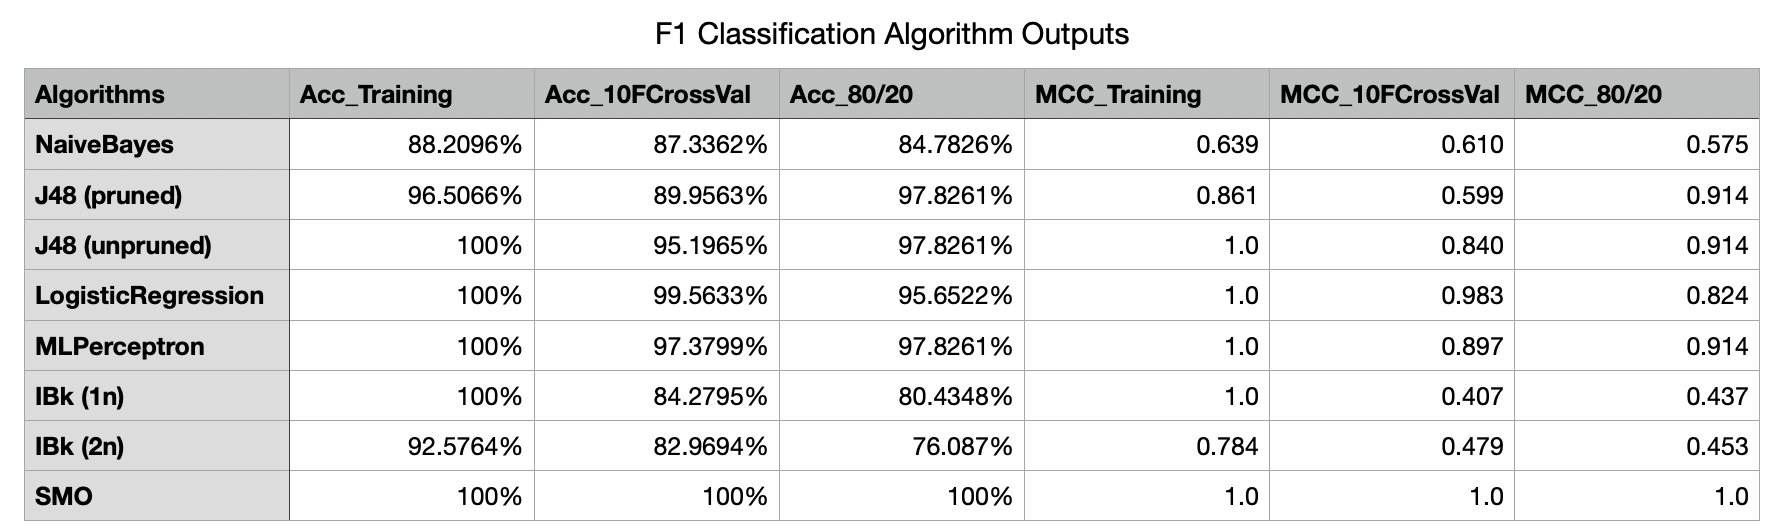
    
With this initial dataset, the accuracies for each algorithm ranged between 76% and 100%, with the lowest MCC value being ~0.41.  With the models which scored 100%, they were mostly from the training set, as mentioned earlier, this is not necessarily a good model to use for future predictions. All algorithms scored reasonably well with cross validation which was a good sign.

I was a little suprised initially at all of the high scoring accuracies given the nature of F1, when I realised there was a lot of bias and direct correlation between providing the models with the drivers final position and whether or not they were on the podium. 
   
#### Reformatting the data (V2) 
I decided the models needed to be redone, as providing them with the final race position wasn't a true test of the accuracies, so reformatted the data and also changed the class variable from just a 'YES' or 'NO' to whether a driver would finish on the 'podium', in the 'points' or with 'no points'. This left me with the following data (round 14 only):  
    
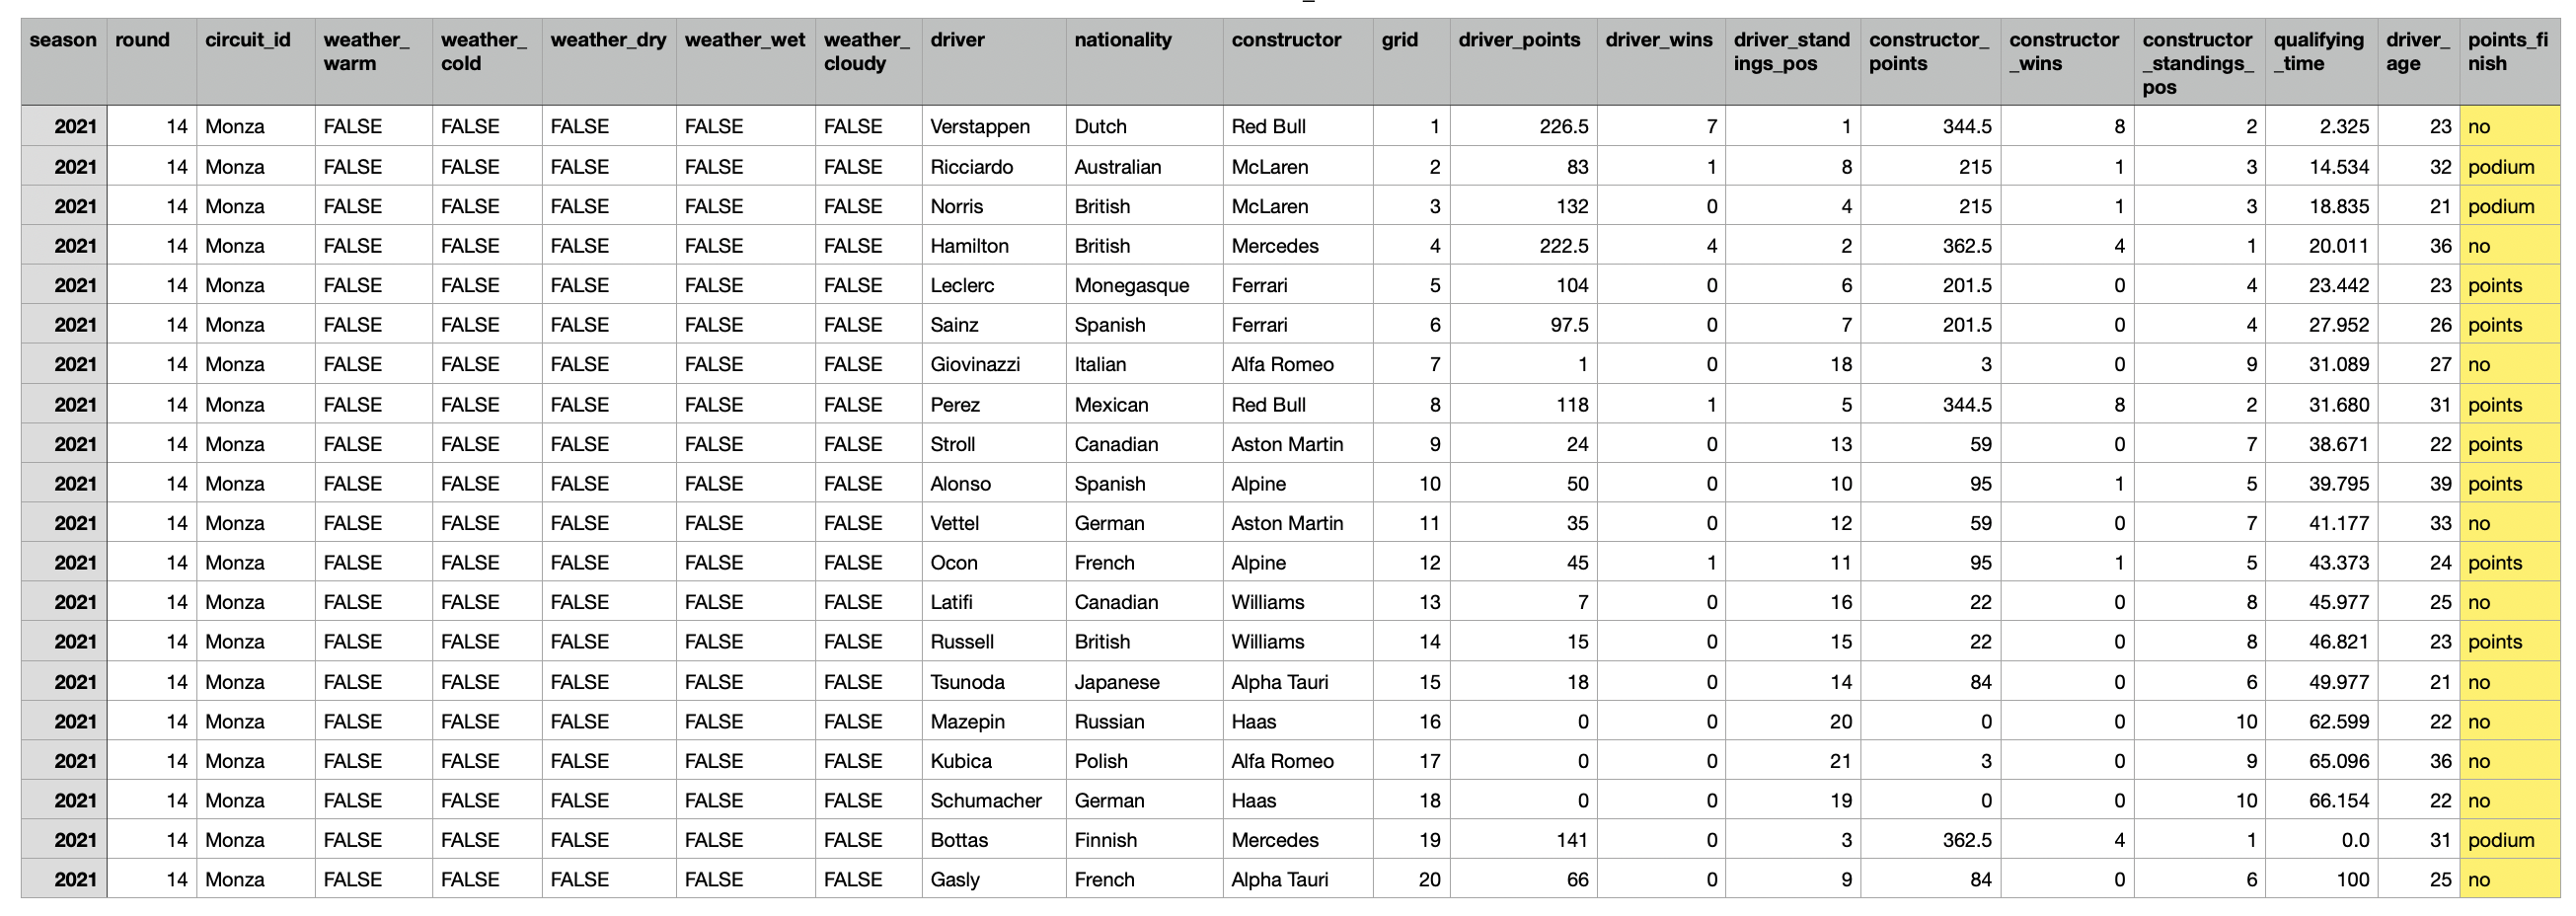

Here is an excerpt of the dataset .arff file

In [ ]:
@relation f1_2021_data_v2

@attribute round {'1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22'}
@attribute circuit_id {'bahrain','imola','portimao','catalunya','monaco','baku','ricard', 'red_bull_ring','silverstone','hungaroring','spa','zandvoort','monza'}
@attribute weather_warm {'TRUE','FALSE'}
@attribute weather_cold {'TRUE','FALSE'}
@attribute weather_dry {'TRUE','FALSE'}
@attribute weather_wet {'TRUE','FALSE'}
@attribute weather_cloudy {'TRUE','FALSE'}
@attribute driver {'hamilton', 'verstappen','ricciardo','bottas','perez','norris','leclerc','sainz','gasly','tsunoda','mazepin','mick_schumacher','vettel','giovinazzi','latifi','russell','ocon','raikkonen','stroll','alonso','kubica'}
@attribute nationality {'british','dutch','finnish','monegasque','french','australian','mexican','spanish','canadian','italian','japanese','german','russian','polish'}
@attribute constructor {'red_bull','mercedes','ferrari','mclaren','alpine','aston_martin','alfa_romeo','alphatauri','williams','haas'}
@attribute grid {'1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'}
@attribute driver_points numeric
@attribute driver_wins {'0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22'}
@attribute driver_standings_pos {'0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21'}
@attribute constructor_points numeric
@attribute constructor_wins {'0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22'}
@attribute constructor_standings_pos {'0','1','2','3','4','5','6','7','8','9','10'}
@attribute qualifying_time numeric
@attribute driver_age numeric
@attribute points_finish {'podium','points','no_points'}

@data
1,bahrain,FALSE,FALSE,FALSE,FALSE,FALSE,verstappen,dutch,red_bull,1,0,0,0,0,0,0,0.0,23,podium
3,portimao,FALSE,FALSE,FALSE,FALSE,FALSE,norris,british,mclaren,7,27,0,3,41,0,3,0.799999999999997,21,points
8,red_bull_ring,FALSE,FALSE,FALSE,FALSE,FALSE,tsunoda,japanese,alphatauri,11,8,0,14,45,0,5,0.700000000000003,21,points
10,silverstone,TRUE,FALSE,TRUE,FALSE,FALSE,gasly,french,alphatauri,12,37,0,8,46,0,6,48.763,25,no_points
14,monza,FALSE,FALSE,FALSE,FALSE,FALSE,ricciardo,australian,mclaren,2,83,1,8,215,1,3,14.534,32,podium

  #### New Model Results  
After retraining the same algorithms as last time, I ended up with the following accuracies and MCC values.   
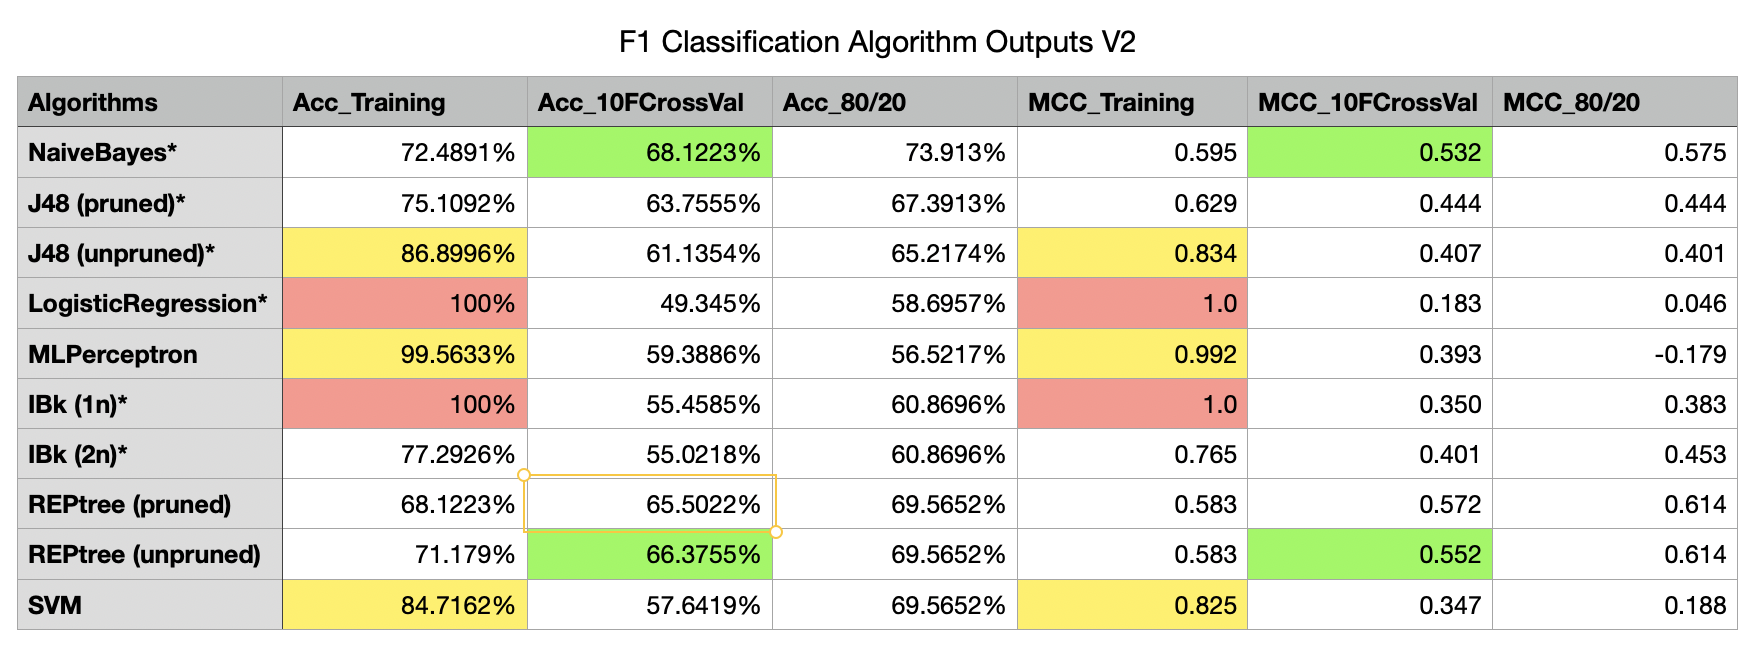  
*Highlights:  
Red = not actually an accurate prediction  
Yellow = scored highly but only using training set so perhaps not as accurate (will still test predictions on these)  
Green = models to be used for predicting the next Grand Prix.*  

Overall, the accuracies dropped by ~20% for most of the algorithms. As I removed the final race position from the original dataset, I definitely expected a drop in accuracy of the newer models, since it directly correlates to my class variable. The newer models also are predicting a class variable with three possible options rather than podium? yes or no. Something which may also have an affect on the lower accuracies could be that drivers battling for the lower end of the points positions can generally vary greatly week to week, making it harder to predict. Whereas, whilst there is obviously variance in the drivers which get on the podium, it seems to be a little more consistent.  
  
The Naive Bayes scored the highest using cross validation, although only with ~68%. This will be the first model used for predictions. As also seen above, although the unpruned value scored very slightly higher in accuracy(66% over 65%), as the tree was unpruned, it theoretically wouldn't generalise the data for future predictions quite as well and the pruned tree has a higher MCC value. For this reason I will be choosing the pruned tree as one of the models to make the future grand prix predictions. 

Both the logistic regression and KNN (1-neighbour) still scored 100%, although as discussed earlier, these algorithms will always score 100% using a training set, so they are not suitable models to use.  

While the Naive Bayes (cross-val) and REPTree (cross-val) will be the primary models I will use for making my predictions, I will also test the algorithms highlighted in yellow from the training data above, just to see how they hold up against the cross-validation models. This will help to give me a better idea of how much overfitting the data is experiencing, and whether the cross-validation really is more accurate. This may be a somewhat difficult prediction to make if the results of future predictions fits into the overfitting experienced by the dataset.  

**Confusion Matrices for Chosen Algorithms**  
Here are the confusion matrices for both the cross validation Naive Bayes and REPTree models. These matrices give an insight into what results were actually classified as. Ideally all of the values would be held in the diagonals, meaning they were all successfully classified.
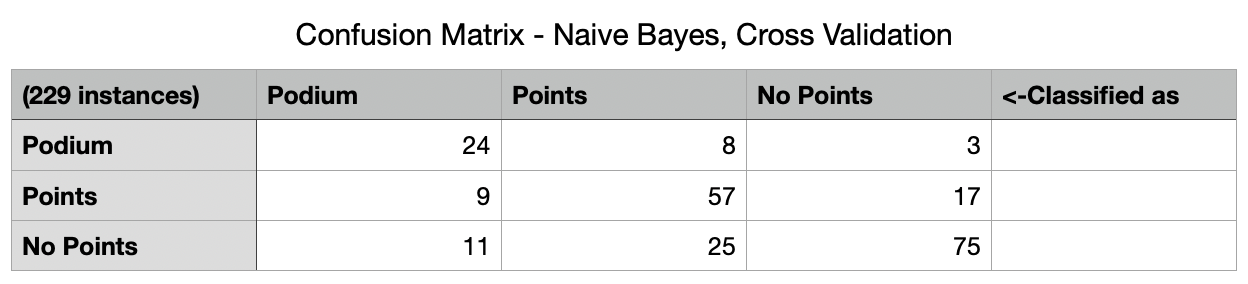  
**The below confusion Matrix is for pruned tree, was labeled incorrectly**  
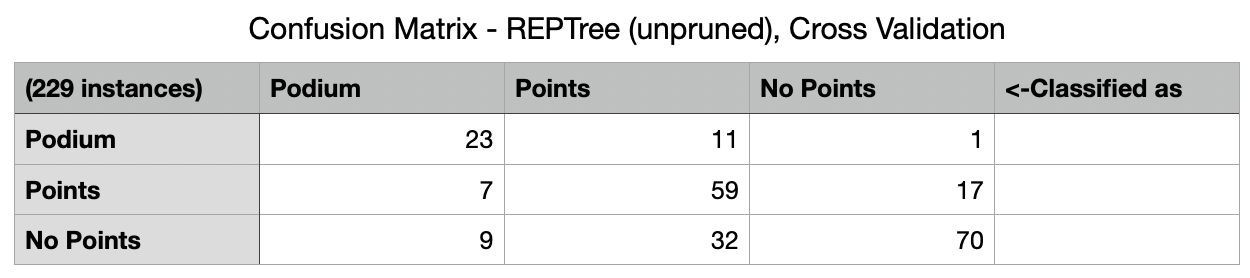  
  
    
The REPTree decision tree, which used the driver as the root node.
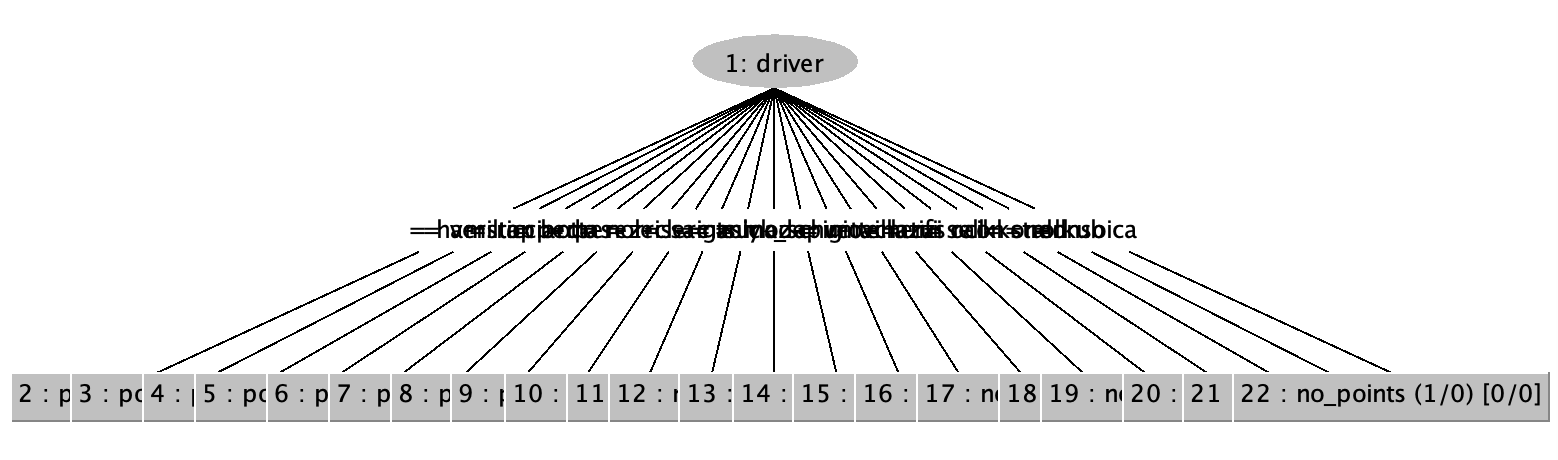

      
#### Predicting the Russian Grand Prix  
Once I gathered and inserted the data (20 new instances) for this Grand Prix into a new .arff file, I tested it first against the NaiveBayes cross validation and REPTree cross validation models to see what the prediction results were. The instances were input in order of grid position, and I got the following prediction results:    
**NaiveBayes Cross Validation Model Predictions**  
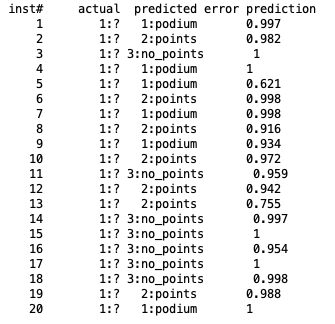  
    
The first thing I noticed with this prediction was that it predicted six drivers to win a podium position, when it is only possible for 3 drivers to achieve this. The error prediction column, which is a measure of how well it predicts the model between 0 and 1 (0 = good, 1=bad), all scored reasonably high, meaning there is a higher chance for error in these predictions. The model also predicted 7 'points' finishes, which whilst usually accurate, the three extra podium positions would theoretically be more likely to score these positions. Although it only had 45% overall accuracy, it still predicted 2/3 of the podium position, even if it did predict 6 overall. Without the rain it probably would have correctly identified all three positions correctly, and two of the other predicted podiums did end up in 4th and 5th - just out of reach of the podium. It also correctly predicted Verstappen's podium finish, even though he was starting from 20th.  
    
**REPTree Cross Validation Model Predictions**    
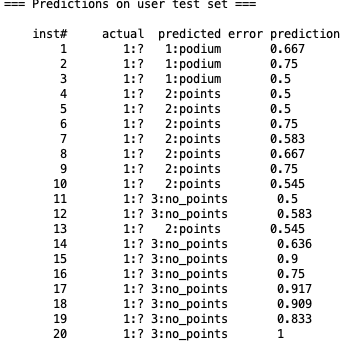
     
A pattern I quickly noticed with the outcome of the REPTree predictions, was that the podium/points/no points were almost all in order of the starting grid positions/qualifying times, which indicates this likely had a large factor in the predictions for this model. It also correctly predicted only three podium positions and only one extra points position, although this may have been somewhat by chance. Whilst the error predictions for this model weren't particularly low, they were definitely lower than with the NaiveBayes model. One instance to note was that it predicted Verstappen to score no points, when he ended up getting second on the podium, but this is likely due to the model seemingly being heavily influenced by starting grid positions and qualifying times, which verstappen did not complete as had a penalty start at the back of the grid anyway.

**The Results**  
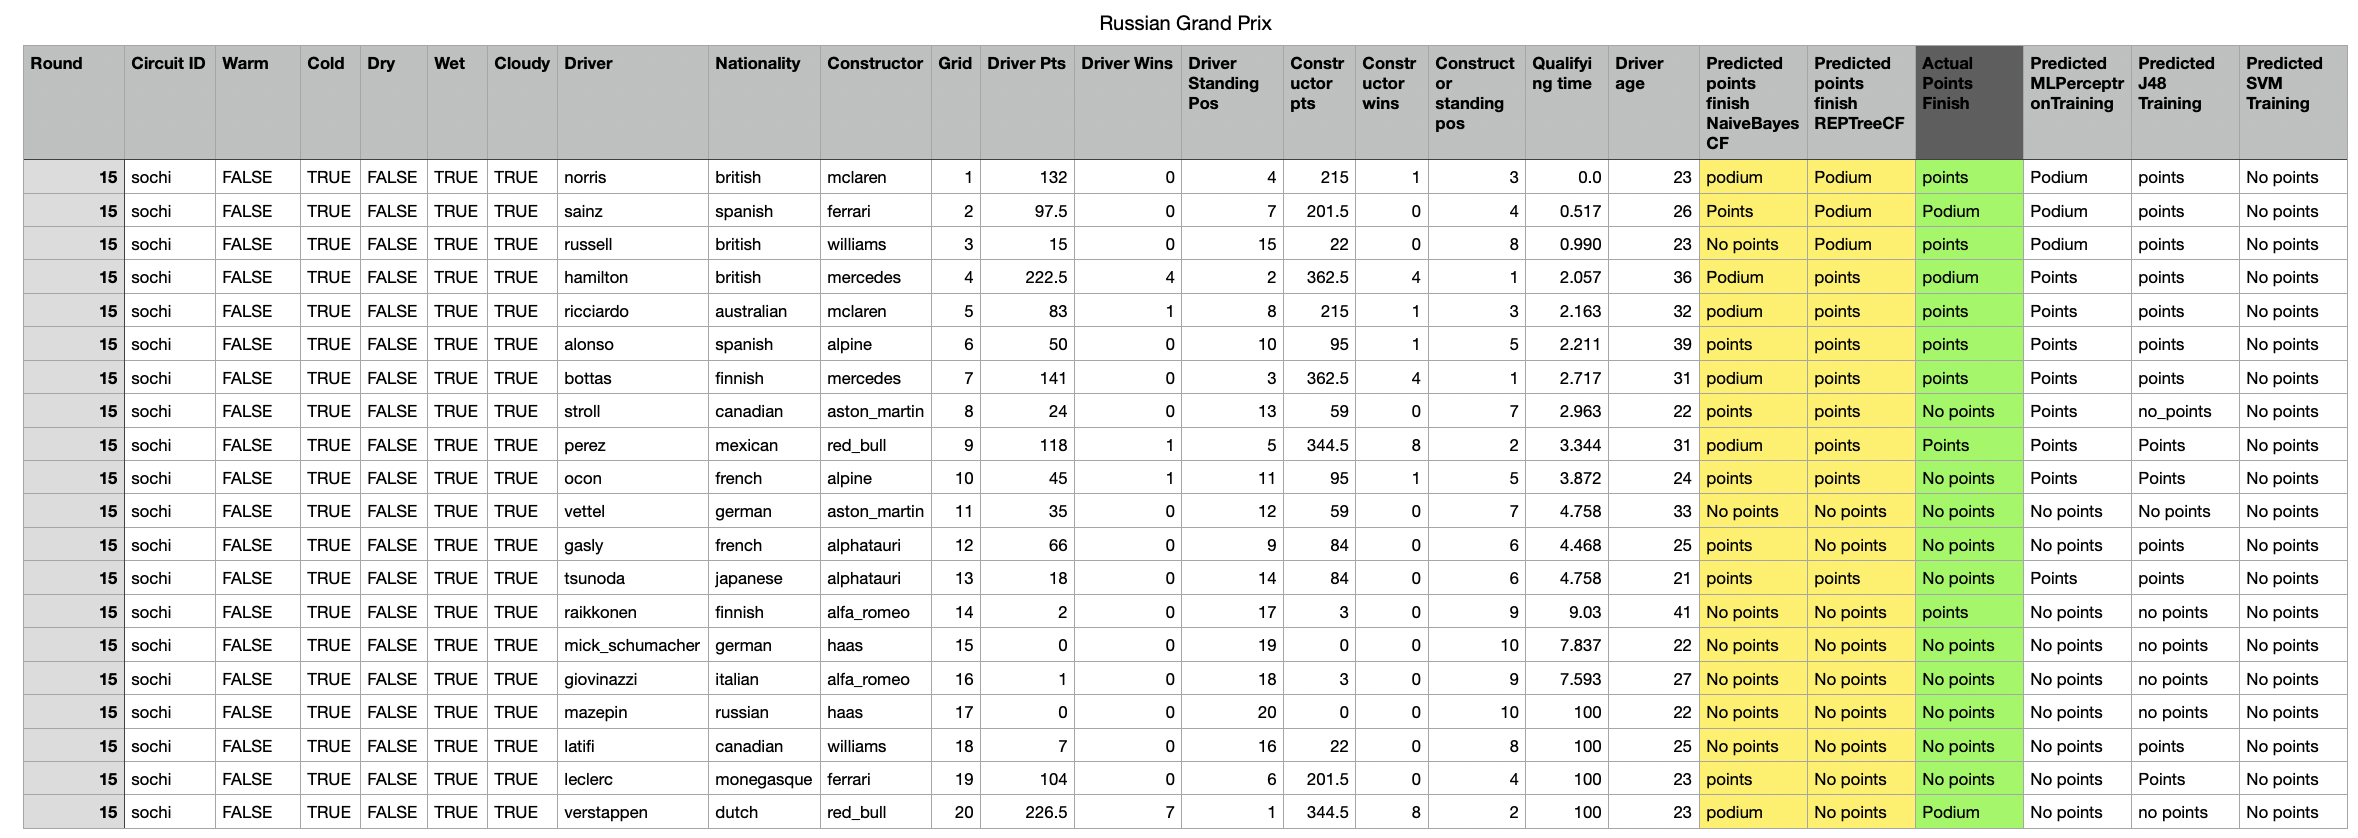

The NaiveBayes model had a 45% success rate with the predictions whilst the REPTree had a 60% success rate, although it is worth noting that the if the extra podium positions predicted by the NaiveBayes model are included as a 'points' win, its success rate would also be 60%. This is compared to the estimated models success rate of ~68% and ~66% respectively. Another point to note from this race, was that it started heavily raining in the last six laps, causing some quite dramatic changes to the final race standings. For example, whilst both models predicted Norris to win a podium position, a late decision to not change to a more wet-weather suited tyre compound saw him quickly fall from 1st to 7th.  
     
Even though using the 'training data' models would theoretically be less accurate than the cross validation models, I ran the predictions against the highest three scoring models from this method just to try and get an idea of the difference it makes. As seen in the above results table, these algorithms scored the following accuracies:  
- MLPerceptron: 65%
- J48 Tree: 55%
- SVM: 50%. Although it is worth noting that the SVM training data model predicted every single driver from the provided instances would score 'no points', therefore it was always guranteed a precise 50% success rate.  
  
  
#### Discussion     
In this particular Grand Prix, the REPTree was the more reliable model, with its 60% accuracy and having predicted the correct number of podium and points finishes. I think that both cross validation models were somehwat useful in predicting a general idea of finishing positions of the Grand Prix, although at this point the models are not quite refined enough to be considered reliable and accurate. It is subjectively a common opinion that the results this season in particular have been much less predictable and 'more exciting', which is something that could also affect the models (using only 2021 data) and the predictability of future Grands Prix. I do think that the current models have the chance to perform slightly higher if used to predict further races,although there is a couple of weeks until the next Grand Prix weekend.  
  
  
#### Improvements and Next Steps  
- Use the current models to predict more Grands Prix, to get a better idea of general performance.
- If i were to further improve this, I think a good next step would be to implement some sort of basic UI using Python to make data entry for predictions a lot smoother and available to be used by others.
- The models could also be made more accurate by including results from previous years, even though there is a lot more data available for some drivers than others. This would assist in removing any overfitting  experienced in the models I have used. Including other attributes would be difficult considering what is publicly available prior to a race, although reasonable predictions on a teams race strategy can also be estimated. As all the data also had to be manually inputted and converted into an .arff file, it was also very time consuming to enter it all and gather some of the data manually.
- I also think it would be more appropriate to set the drivers age attribute to a range variable and have something along the lines of: '17-23', '24-27' etc. Particularly as some drivers ages will go up during the season, and considering we are only looking at 20 drivers - age groups may give a better idea of experience as drivers can be grouped together by age more easily.
- See if there is a way to make sure only 3 podium positions are predicted, and the 7 remaining point positions.
- As seen in the Russian Grand Prix results with Max Verstappen's prediction from the REPTree model, I think it could be worth adding an additional boolean attribute of 'Grid Penalty', which would give further indication of whether a driver is at the back of the grid due to a penalty or slow qualifying time/accident.
- A further implementation of some kind of 'overtakes' or 'average overtakes' could also help provide more accurate results, and show a drivers chances of moving up through the positions, particularly for those who face grid penalties.

### **References**
 
Brownlee, J. (2019, August 22). How To Use Classification Machine Learning Algorithms in Weka. Machine Learning Mastery. https://machinelearningmastery.com/use-classification-machine-learning-algorithms-weka/  
<br>
Brownlee, J. (2020, December 9). How to Save Your Machine Learning Model and Make Predictions in Weka. Machine Learning Mastery. https://machinelearningmastery.com/save-machine-learning-model-make-predictions-weka/  
<br>
Data Professor. (2020, November 1). Weka Tutorials. YouTube. https://www.youtube.com/watch?v=t5mylGHE2Fg&list=PLtqF5YXg7GLlYlq-OjlrJHAxpaziuaabg
<br>
ESPN. (2021). Formula One Standings. ESPN.Com. https://www.espn.com/f1/standings/_/sort/aut2/dir/desc  
<br>
FIA. (2021). F1 2021 Results. Formula 1® - The Official F1® Website. https://www.formula1.com/en/results.html/  
<br>
RacingNews365 Staff. (2021, September 12). Starting Grid: F1 2021 Italian Grand Prix. RacingNews365. https://racingnews365.com/starting-grid-2021-italian-grand-prix  
<br>
Sood, P. (2021, August 28). F1 race by race (1983–2021). Kaggle. https://www.kaggle.com/prajwalsood/f1-race-by-race-19832021
Witten, I. H., Frank, E., Hall, M. A., & Pal, C. J. (2016). The Weka Workbench (Fourth ed.). Waikato University. https://www.cs.waikato.ac.nz/ml/weka/Witten_et_al_2016_appendix.pdf  
<br>